In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
dataroot = "/storage/groups/qscd01/datasets/Histimages5center/data"

In [3]:
dirs = []
for d in range(ord('A'), ord('A') + 5):
    dirs.append(os.scandir(dataroot + "/train" + chr(d)))

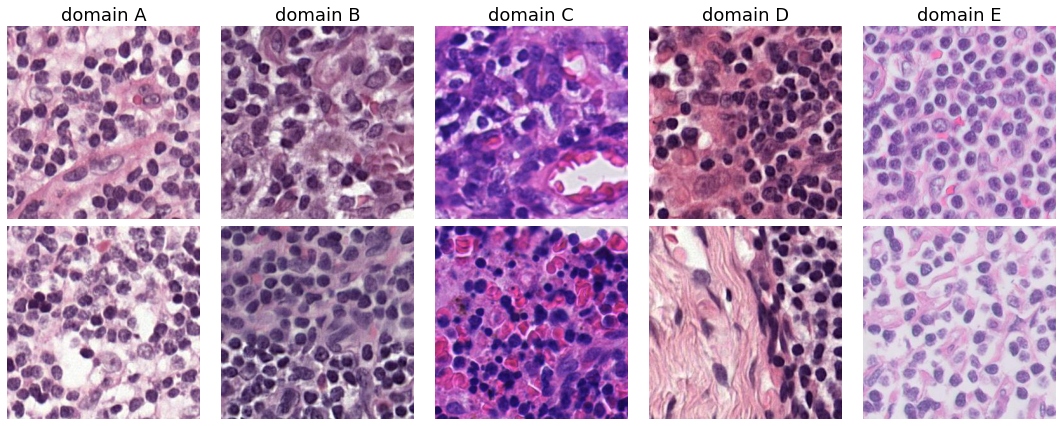

In [4]:
plt.figure(figsize=(15, 6), facecolor=(0, 0, 0, 0))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    name = next(dirs[i%5]).name
    img = Image.open(dataroot + "/train" + chr(ord('A') + i%5) + "/" + name)
    plt.imshow(img)
    if i < 5:
        plt.title("domain " + chr(ord('A') + i%5), fontsize=18)
    plt.axis('off')
plt.tight_layout()
# plt.savefig("train_images.png")

Analyze whole-slide-images

In [25]:
wsi_root = "/storage/groups/qscd01/datasets/Histimages5center/"

In [26]:
wsi_dir = os.scandir(wsi_root + "trainA1")

In [12]:
name = next(wsi_dir)
print(name.name)

016_1609.jpg


In [29]:
next(wsi_dir).name

'016_16483.jpg'

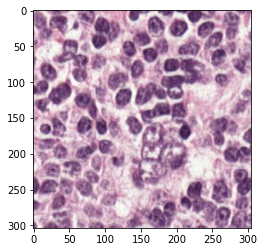

In [16]:
img = Image.open(wsi_root  + "trainA1/" + name.name)
plt.imshow(img)
plt.show()

In [17]:
import openslide
from torchvision import transforms

In [19]:
wsi_dir = os.scandir(wsi_root + "trainAzip")
name = next(wsi_dir)
slide = openslide.OpenSlide(wsi_root + "trainAzip/" + name.name)

In [20]:
slide.dimensions

(94968, 210579)

In [21]:
dims = slide.level_dimensions
print(dims)

((94968, 210579), (47484, 105289), (23742, 52644), (11871, 26322), (5935, 13161), (2967, 6580), (1483, 3290), (741, 1645), (370, 822))


In [22]:
factors = slide.level_downsamples
# print(factors)

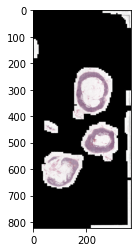

In [23]:
level = 8
img = slide.read_region((0, 0), level , dims[level]) 
plt.imshow(img)

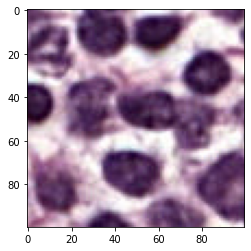

In [24]:
img = slide.read_region((56000, 132000), 0 , (100, 100)) 
plt.imshow(img)